In [9]:
# Libraries required
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Change path to the files
pwd = 'TGA/'
os.chdir(pwd)

# Concat DataFrame

In [11]:
#read in the files
for xx in range(1,11):
    #change the file name at 10
    ns = 'I0'
    if xx == 10:
        ns = 'I'
    for y in range(1,5):
        for z in range(0,10):
            #check if path existed
            if os.path.exists(ns+str(xx)+'R'+str(y)+'V'+str(z)+'.CSV'):
                # Read the csv files and naming its columns
                df = pd.read_csv(ns+str(xx)+'R'+str(y)+'V'+str(z)+'.CSV', 
                     names=
                        ['Day_of_Year',
                        'UTC_Hours',
                        'UTC_Minutes',
                        'UTC_seconds',
                        'IOP_number',
                        'van_number',
                        'pass_number',
                        'hours_in_CDT_day_start',
                        'latitude',
                        'longitude', 
                        'altitude',
                        'number_of_satellites',
                        'hdop',
                        'concentration_of_SF6',
                        'QC_flag'])
                # generate release Dataframe dff based on the first csv
                if z == 0:
                    vn = 'concentration_van'+str(z)
                    df[vn] = df['concentration_of_SF6']+999
                    k = df['hours_in_CDT_day_start'][0]
                    df['Time_in_mins'] = df['hours_in_CDT_day_start'].apply(lambda x: (x-k)*60)
                    dff = df[['Day_of_Year','UTC_Hours','UTC_Minutes','UTC_seconds','Time_in_mins','latitude',
                        'longitude','QC_flag', vn]]
                # eliminate the moving van data   
                elif z == 5:
                        continue
                # generate a new column and concat it to dff
                else:
                    vn = 'concentration_van'+str(z)
                    df[vn] = df['concentration_of_SF6']+999
                    lalo = df[['latitude','longitude','QC_flag']]
                    df = pd.DataFrame(df[vn])
                    df = pd.concat([lalo,df], axis = 1)
                    dff = pd.concat([dff,df], axis = 1)
            # if path not exist, continue       
            else:
                continue
        print(ns+str(xx)+'R'+str(y))
#         display(dff)
#        dff.to_csv(ns+str(xx)+'R'+str(y)+".csv", index = False)

I01R1
I01R2
I01R3
I01R4
I02R1
I02R2
I02R3
I02R4
I03R1
I03R2
I03R3
I03R4
I04R1
I04R2
I04R3
I04R4
I05R1
I05R2
I05R3
I05R4
I06R1
I06R2
I06R3
I06R4
I07R1
I07R2
I07R3
I07R4
I08R1
I08R2
I08R3
I08R4
I09R1
I09R2
I09R3
I09R4
I10R1
I10R2
I10R3
I10R4


In [12]:
dfR1 =pd.read_csv('I01R1.csv')
dfR1.head()

,Day_of_Year,UTC_Hours,UTC_Minutes,UTC_seconds,Time_in_mins,latitude,longitude,QC_flag,concentration_van0,latitude.1,...,QC_flag.6,concentration_van7,latitude.7,longitude.7,QC_flag.7,concentration_van8,latitude.8,longitude.8,QC_flag.8,concentration_van9
0,180,14,0,0.0,0.000000,35.469797,-97.5147,5,0.0,35.470805,...,5,0.0,35.470779,-97.514605,5,0.0,35.468842,-97.516609,5,0.0
1,180,14,0,0.5,0.008334,35.469797,-97.5147,5,0.0,35.470805,...,5,0.0,35.470779,-97.514605,5,0.0,35.468842,-97.516609,5,0.0
2,180,14,0,1.0,0.016668,35.469797,-97.5147,5,0.0,35.470805,...,5,0.0,35.470779,-97.514605,5,0.0,35.468842,-97.516609,5,0.0
3,180,14,0,1.5,0.025002,35.469797,-97.5147,5,0.0,35.470805,...,5,0.0,35.470779,-97.514605,5,0.0,35.468842,-97.516609,5,0.0
4,180,14,0,2.0,0.033336,35.469797,-97.5147,5,0.0,35.470805,...,5,0.0,35.470779,-97.514605,5,0.0,35.468842,-97.516609,5,0.0


# Find suitable training van

In [13]:
# request 1 find the two further van from release point
# request 2 find van with lesser qc flag problem
# request 3 have enough variance
# based on potential training group
#(IOP3R1 IOP4R1) (IOP5R4 IOP6R4) (IOP9R4 IOP10R4)
westin_puff_1000 = ['I01R1.csv', 'I02R1.csv']
gardens_puff_1000 = ['I03R1.csv', 'I04R1.csv']
gardens_puff_500 = ['I05R4.csv', 'I06R4.csv']
park_puff_300 = ['I09R4.csv', 'I10R4.csv']
#(IOP1R2 IOP1R3 IOP2R2 IOP2R3 IOP2R4)
westin_point_5 = ['I01R2.csv', 'I01R3.csv', 'I02R2.csv', 'I02R3.csv', 'I02R4.csv']
#(IOP3R3 IOP3R4 IOP4R2 IOP4R3 IOP4R4 IOP5R2 IOP5R3 IOP6R1 IOP6R2 IOP6R3 IOP7R1)
garden_point_3 = ['I03R3.csv','I03R4.csv','I04R2.csv','I04R3.csv','I04R4.csv','I05R2.csv','I05R3.csv','I06R1.csv','I06R2.csv','I06R3.csv','I07R1.csv']
#(IOP5R1 IOP7R2 IOP7R3)
garden_point_2 = ['I05R1.csv','I07R2.csv','I07R3.csv']
#(IOP9R1 IOP9R2 IOP9R3 IOP10R1 IOP10R2 IOP10R3)
parks_point_2 = ['I09R1.csv', 'I09R2.csv', 'I09R3.csv', 'I10R1.csv', 'I10R2.csv', 'I10R3.csv']

In [14]:
# Find on pdf page 9
# (Iop 1,2,8) Westin
la1 = 35.467333
lo1 = 97.5146000
#(Iop 3-7) Gardens
la2 = 35.466167
lo2 = 97.5165
# (Iop 9,10) Park
la3 = 35.4687167
lo3 = 97.515567

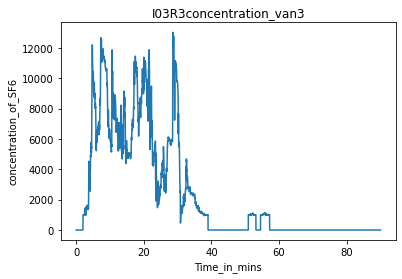

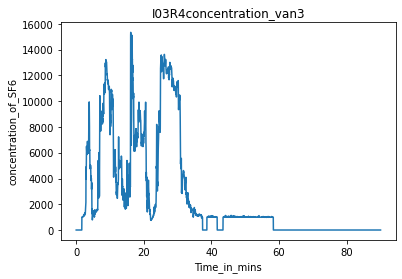

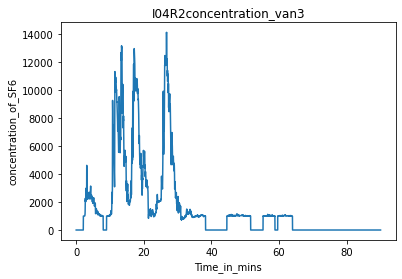

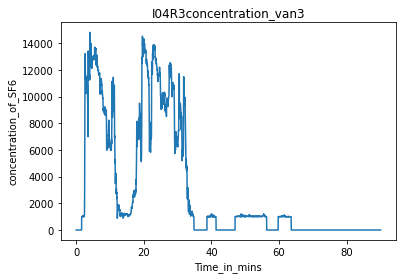

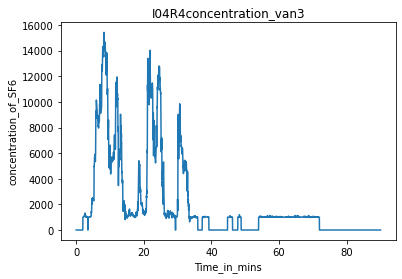

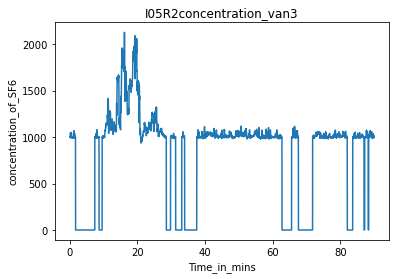

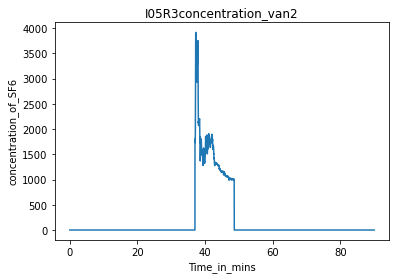

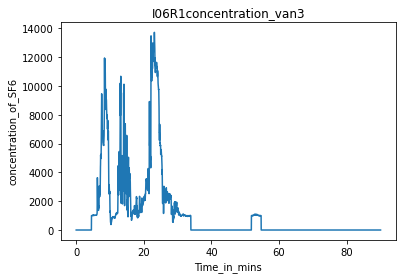

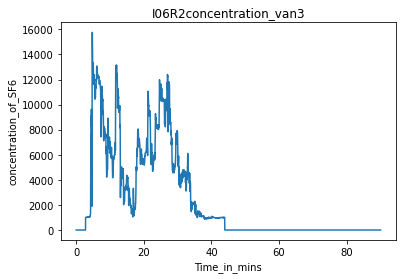

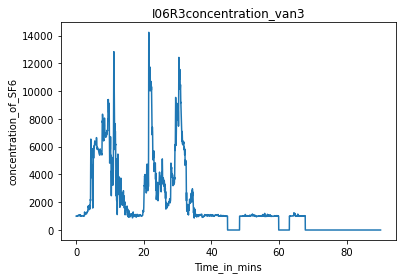

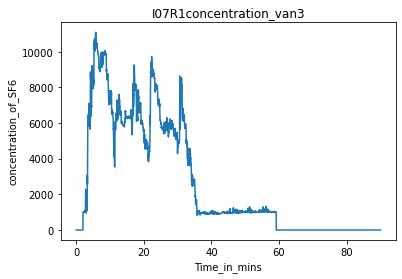

{'I05R2concentration_van3': (247235.07661428736,
  0        1001.1
  1         997.1
  2        1001.0
  3        1001.0
  4        1000.9
            ...  
  10796    1005.7
  10797    1010.3
  10798    1005.7
  10799    1005.6
  10800    1005.6
  Name: concentration_van3, Length: 10801, dtype: float64,
  5    10801
  Name: QC_flag.2, dtype: int64),
 'I05R3concentration_van2': (307029.215332895,
  0        0.0
  1        0.0
  2        0.0
  3        0.0
  4        0.0
          ... 
  10796    0.0
  10797    0.0
  10798    0.0
  10799    0.0
  10800    0.0
  Name: concentration_van2, Length: 10801, dtype: float64,
  6    7562
  0    2008
  8     463
  9     409
  5     359
  Name: QC_flag.1, dtype: int64),
 'I06R3concentration_van3': (5926230.425268529,
  0         997.8
  1        1001.1
  2        1001.1
  3        1001.1
  4        1001.1
            ...  
  10796       0.0
  10797       0.0
  10798       0.0
  10799       0.0
  10800       0.0
  Name: concentration_van3, Length: 

In [40]:
# loop for garden group
# read the files
infoDic = {}
for k in garden_point_3:
    df = pd.read_csv(k)
    distance_list = []
    for i in range(0,9):
        if i == 0:
            lo = df['longitude'][0]
            la = df['latitude'][0]
            d = ((la1 - la)**2 + (lo1 + lo)**2)**0.5
            distance_list.append(d)

        elif i == 5:
            continue
        else:
            lon = 'longitude.' + str(i)
            lan = 'latitude.' + str(i)
            lo = df[lon][0]
            la = df[lan][0]
            d = ((la1 - la)**2 + (lo1 + lo)**2)**0.5
            distance_list.append(d) 
    maxd = max(distance_list)
#     print("furthest van is van" + str(distance_list.index(maxd) + 1))
    if distance_list.index(maxd) + 2 != 0:
        qcn = "QC_flag." + str(distance_list.index(maxd))
    else:
        qcn = "QC_flag"
    cn = "concentration_van" + str(distance_list.index(maxd) + 1)
#     print('variance is '+str(np.var(df[cn])))
#     print("QC-flag situatioon is ")
#     print(df[qcn].value_counts())
    infoDic.update({k.strip('.csv')+cn : (np.var(df[cn]),df[cn],df[qcn].value_counts())} )
    plt.plot(df['Time_in_mins'],df[cn],label = cn)
    plt.xlabel('Time_in_mins')
    plt.ylabel('concentration_of_SF6')
    plt.title(k.strip('.csv')+cn)
    plt.show()
Sort_infoDic = dict(sorted(infoDic.items(), key=lambda item: item[1]))
Sort_infoDic